In [33]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams

In [34]:
rcParams['figure.figsize'] = 10, 20

In [35]:
def makeImageData(imgpath):
    img_req = None
    with open(imgpath, 'rb') as f:
        ctxt = b64encode(f.read()).decode()
        img_req = {
            'image': {
                'content': ctxt
            },
            'features': [{
                'type': 'DOCUMENT_TEXT_DETECTION',
                'maxResults': 1
            }]
        }
    return json.dumps({"requests": img_req}).encode()

In [36]:
def requestOCR(url, api_key, imgpath):
  imgdata = makeImageData(imgpath)
  response = requests.post(ENDPOINT_URL, 
                           data = imgdata, 
                           params = {'key': api_key}, 
                           headers = {'Content-Type': 'application/json'})
  return response

In [37]:
# with open('vision_api.json') as f:
#     data = json.load(f)

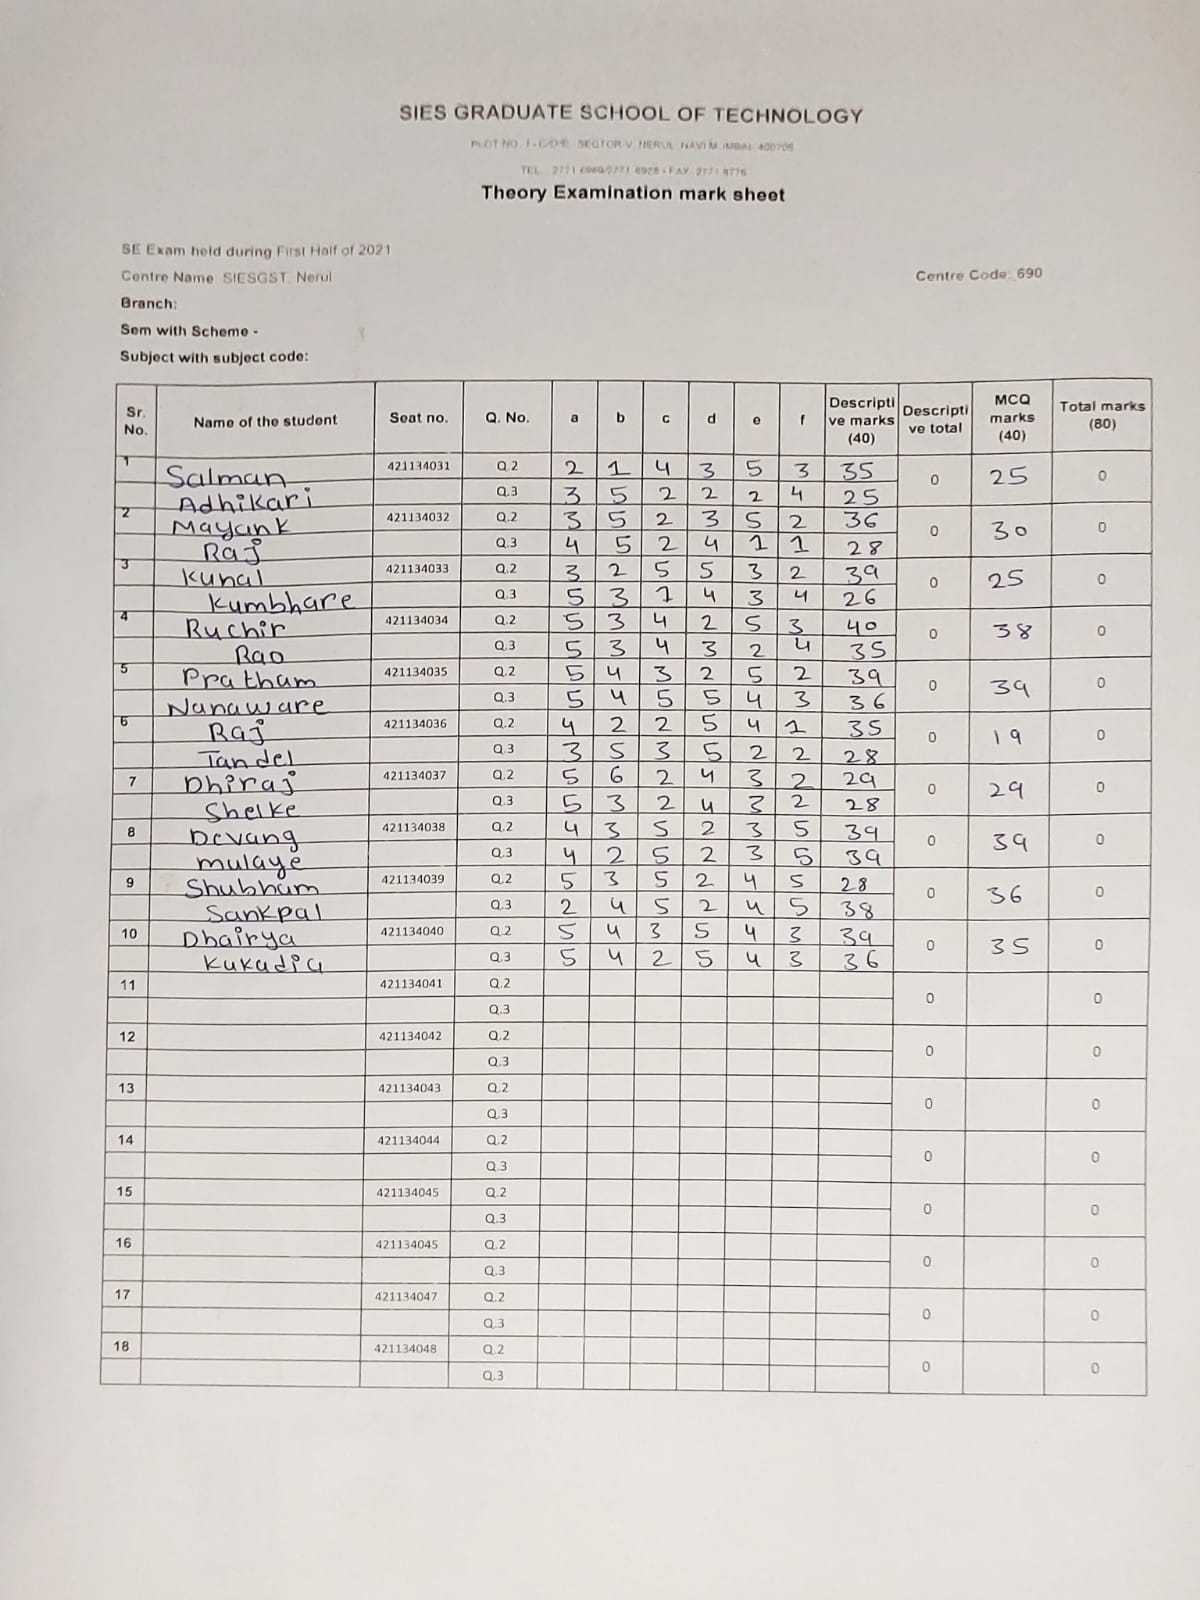

In [39]:
Image(img_loc)

In [40]:
result = requestOCR(ENDPOINT_URL, api_key, img_loc)

In [41]:
if result.status_code != 200 or result.json().get('error'):
    print ("Error")
else:
    result = result.json()['responses'][0]['textAnnotations']

Error


In [42]:
print(result)

<Response [403]>


In [43]:
# call google vision api
response = requests.post(ENDPOINT_URL,
                         data=img_loc,
                         params={'key': api_key},
                         headers={'Content-Type': 'application/json'})


In [44]:
response

<Response [400]>